In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
cwd = os.getcwd()
print cwd
import scripts.calcon as m

/Users/yaakovtayeb/github/machine.learning/Tools


In [2]:
#file columns are formated as:  site, device, year, month, SW value, GA value
data = pd.read_clipboard(sep='\t') #read from clipboard
set(data["Month"])
data["Month"]=map(m.Month2Num, data["Month"])

In [3]:
data["SW value"]=data["SW value"].str.replace(",","").astype('float')
data["GA value"]=data["GA value"].str.replace(",","").astype('float')
data["SW-WW"]=data["SW-WW"].str.replace(",","").astype('float')

In [4]:
data

,site,Year,device,Month,GA value,SW value,SW-WW
0,99acres.com,2016,desktop,4,4505692.0,3368529.0,3672176.0
1,99acres.com,2016,desktop,5,4640054.0,3625624.0,3927876.0
2,99acres.com,2016,desktop,6,4634820.0,3630764.0,3891760.0
3,99acres.com,2016,desktop,7,4688520.0,3391903.0,3693705.0
4,99acres.com,2016,desktop,8,4625705.0,3440056.0,3741874.0
5,99acres.com,2016,desktop,9,4523815.0,3126548.0,3371398.0
6,99acres.com,2016,desktop,10,3913242.0,2828697.0,3065432.0
7,99acres.com,2016,desktop,11,3564214.0,2611551.0,2810532.0
8,99acres.com,2016,desktop,12,3477466.0,2418248.0,2631954.0
9,99acres.com,2017,desktop,1,4120051.0,2885979.0,3165010.0


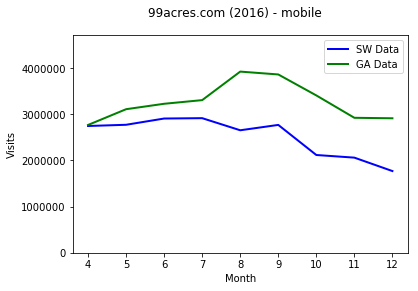

device:	 mobile
delta:	 -0.228543928152
site:	 99acres.com
corr:	 0.326109686805
year:	 2016


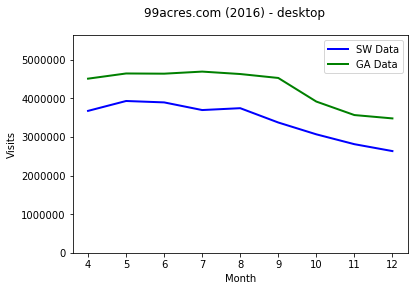

device:	 desktop
delta:	 -0.201351066462
site:	 99acres.com
corr:	 0.960170054179
year:	 2016


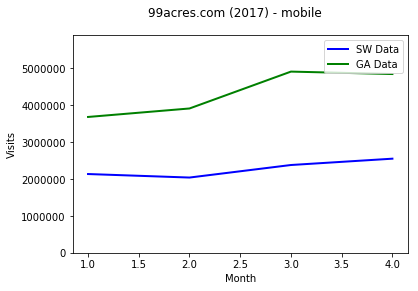

device:	 mobile
delta:	 -0.475220794778
site:	 99acres.com
corr:	 0.889888321909
year:	 2017


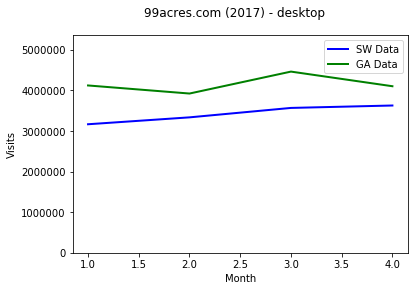

device:	 desktop
delta:	 -0.175289024173
site:	 99acres.com
corr:	 0.435042712016
year:	 2017
[{'device': 'mobile', 'year': 2016, 'site': '99acres.com', 'corr': 0.32610968680509078, 'delta': -0.22854392815216337}, {'device': 'desktop', 'year': 2016, 'site': '99acres.com', 'corr': 0.96017005417882217, 'delta': -0.20135106646195286}, {'device': 'mobile', 'year': 2017, 'site': '99acres.com', 'corr': 0.88988832190852707, 'delta': -0.47522079477769347}, {'device': 'desktop', 'year': 2017, 'site': '99acres.com', 'corr': 0.43504271201591777, 'delta': -0.17528902417320461}]


In [6]:
saveit=False
summary=list()
local_summary={}    
for sites in set(data["site"]):
    local_summary["site"]=sites
    for y in set(data["Year"]):
        local_summary["year"]=y
        for devices in set(data["device"]):
            tmp_data=data.loc[(data['site'] == sites) & (data['device'] == devices) & (data['Year'] == y)]
            x=list(set(tmp_data.Month))
            y_sw=tmp_data["SW-WW"]
            y_ga=tmp_data["GA value"]
            local_summary["device"]=devices
            #plot
            plt.figure(1, figsize = (8,4))
            plt.plot(x, y_sw, 'b-', label='SW Data', linewidth=2.0)
            plt.plot(x, y_ga, 'g-', label="GA Data", linewidth=2.0)
            plt.xlabel('Month')
            plt.ylabel('Visits')
            plt.legend(loc='upper right')
            plt.suptitle("%s (%d) - %s" % (sites, y, devices))
            ymax=int(np.max(np.concatenate((y_ga,y_sw))))
            plt.ylim([0,1.2*ymax])
            if saveit==True:
                plt.savefig("output\\%s (%d) - %s.png" % (sites, y, devices)) #save the plot to fil
            else:
                plt.show() #display the plot
            plt.clf()
            local_summary["delta"]=(sum(y_sw)-sum(y_ga))/float(sum(y_ga))
            local_summary["corr"]=np.corrcoef(y_sw,y_ga)[0,1]
            summary.append(dict(local_summary))
            #print details for each site, year, device
            for k,v in local_summary.iteritems():
                print "%s:\t %s" % (k, v)
            #raw_input("Press Enter to continue...") #stop for manual processing
print(summary)

In [196]:
data["Year"]=2016

In [18]:
output=pd.DataFrame(summary)
output.to_csv('C:\\Users\\yaakov.tayeb\\Desktop\\\dis_data.csv', header=True, mode='a')